<h2 id="importing_libraries">Importing required libraries</h2>

In [24]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Linear Regression

$$ Y = ax$$

<a id="ref2"></a>
# Non-Linear Regression example

For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 

In [66]:
import numpy as np
import pandas as pd

df = pd.read_csv("train.csv")
df = df.drop(['Province_State', 'Date'], axis = 1)
df = df.query('Country_Region == "Japan"')
df = df.rename(columns={'ConfirmedCases':'AccumulatedCases'})
df.Id = df.Id - 14200
#df = df.query('Id > 30')
df.tail(70)

,Id,Country_Region,AccumulatedCases,Fatalities
9940,1,Japan,2.0,0.0
9941,2,Japan,2.0,0.0
9942,3,Japan,2.0,0.0
9943,4,Japan,2.0,0.0
9944,5,Japan,4.0,0.0
...,...,...,...,...
10005,66,Japan,1468.0,49.0
10006,67,Japan,1693.0,52.0
10007,68,Japan,1866.0,54.0
10008,69,Japan,1866.0,54.0


### Plotting the Dataset ###
This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.

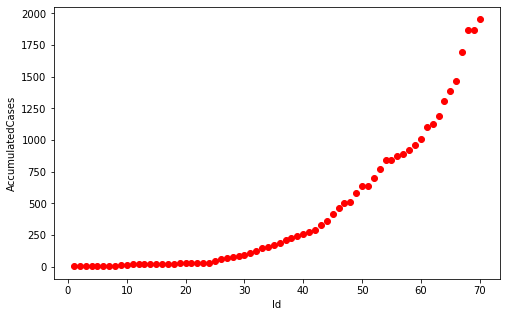

In [67]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Id"].values, df["AccumulatedCases"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
plt.show()

### Choosing a model ###

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

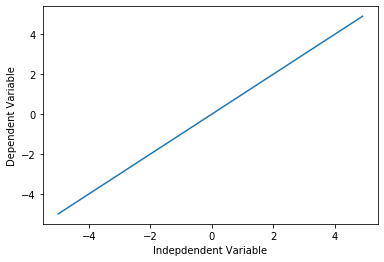

In [68]:
X = np.arange(-5.0, 5.0, 0.1)
#Y = 1.0 / (1.0 + np.exp(-X))
Y = 1.0*X

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()



The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

### Building The Model ###
Now, let's build our regression model and initialize its parameters. 

In [69]:
def linearxx(x, Beta_1,Beta_2):
     y = Beta_1+Beta_2*x
     return y

Lets look at a sample sigmoid line that might fit with the data:

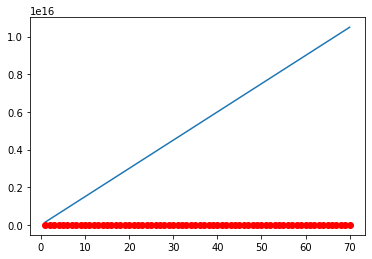

In [70]:
beta_1 = 0.10
beta_2 = 1000.0
#logistic function
Y_pred = linearxx(x_data, beta_1, beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*150000000000.)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [71]:
# Lets normalize our data
xdata =np.log(x_data/max(x_data))
ydata =np.log(y_data/max(y_data))

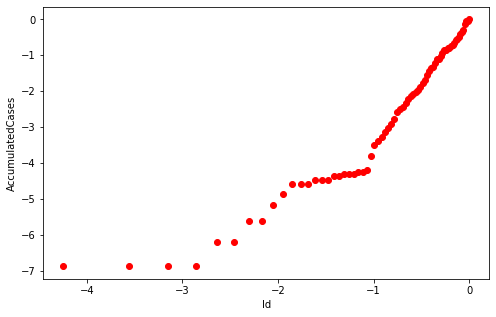

In [72]:
plt.figure(figsize=(8,5))
#x_data, y_data = (df[""].values, df[""].values)
plt.plot(xdata, ydata, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
plt.show()

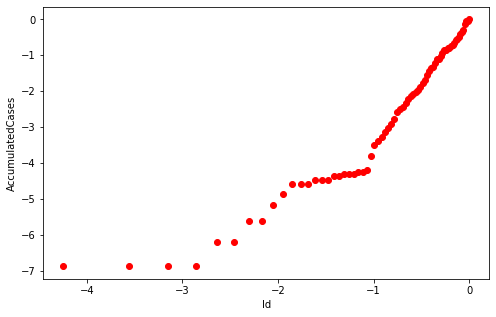

In [73]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [74]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(linearxx, xdata, ydata)
# pcov shows the range of beta
err = np.sqrt(np.diag(pcov))
#print the final parameters
print(" beta_1 = %f±%f, beta_2 = %f±%f" % (popt[0], err[0], popt[1], err[1]))

 beta_1 = -0.775745±0.110427, beta_2 = 2.081775±0.083935


Now we plot our resulting regression model.

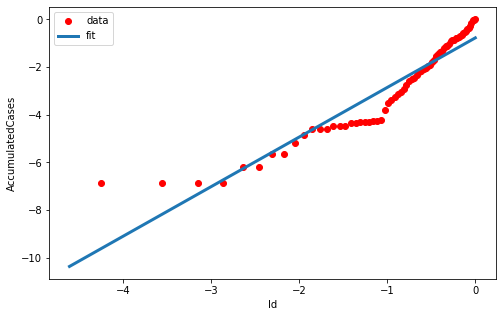

In [75]:
x = np.linspace(1,100, 99)
x = np.log(x/max(x))
plt.figure(figsize=(8,5))
y = linearxx(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('AccumulatedCases')
plt.xlabel('Id')
plt.show()

## Accuracy

In [78]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(linearxx, train_x, train_y)

# predict using test set
y_hat = linearxx(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.40
Residual sum of squares (MSE): 0.23
R2-score: 0.86


--end of this notebook--